<a href="https://colab.research.google.com/github/ThiagoHColtro/DataCleaning/blob/main/BC_saldo_balan%C3%A7a_comercial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISE DO HISTÓRICO DO SALDO DA BALANÇA COMERCIAL BRASILEIRA**

O presente projeto tem como objetivo analisar o histórico da balança comercial do Brasil, a fim de responder:

1) Se a balança comercial é históricamente superavitária ou deficitária;

2) De que modo a variação da taxa cambial impacta as exportações e importações e, consequentemente, o saldo da balança comercial;

3) Quais outros fatores endógenos e exógenos podem explicar alterações nas exportações e importações.

Importante destacar que as informações incluídas na presente análise limitam-se àquelas obtidas até o mês de maio do ano de 2025, de modo que a análise referente a este ano é apenas parcial.

Para atender aos fins da presente análise, foram escolhidas os bens com maior representação na balança comercial brasileira, dentre os bens e serviços exportados e importados: soja, minério de ferro, petróleo bruto, carne bovina, açúcar, café.

Fontes:

A análise utiliza dados de diversas fontes:

a) Os dados acerca da balança comercial, fornecidos pelo Banco Central do Brasil. Foram obtidos mediante acesso ao portal "ComexVis", do Ministério de Desenvolvimento, Indústria, Comércio e Serviços.

Os dados referentes ao saldo da Balança Comercial e Serviços do Brasil tem como base os valores das transações de itens que são resultados de processos produtivos.Os valores apresentados tem como unidade de medida a de "milhões de dólares americanos".

A última alteração nos metadados ocorreu em 16/04/2025, tendo o acesso ao banco de dados ocorrido na data de 30/06/2025.

b) Também foi utilizado o

c) Por fim, foi utilizado o histórico de preços das principais commodities exportadas pelo Brasil, obtidos na "Pink Sheet" da Organização Mundial de Comércio, atualizados até julho de 2025.

A OMC utiliza como valores unitários para cálculo dos preços internacionais das commodities, de modo que:
- Para óleo bruto de petróleo é usada a unidade "\$/bbl" (dólares por barril);
- Soja tem como base a unidade "\$/mt" (dólares por tonelada métrica);
- Minério de ferro tem seu preço em dólares definido pelo conteúdo metálico em uma tonelada seca de minério, unidade "\$/dmtu" (unidade seca por tonelada métrica);
- Café, açúcar e carne bovina são calculados com base na unidade "\$/kg" (dólares por quilo).

# 1. Importação dos dados
## 1.1. Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2. Dataset

As tabelas de exportação e importação encontravam-se separadas. Para facilitar a visualização dos dados, optei por juntar ambas e criar uma coluna "saldo" a partir dessas.

In [ ]:
DataExp = pd.read_excel('H_EXPORTACAO_GERAL_1997-01_2025-12_DT20250711.xlsx')
DataExp

,Mês,2025 - Valor US$ FOB,2024 - Valor US$ FOB,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,...,2006 - Valor US$ FOB,2005 - Valor US$ FOB,2004 - Valor US$ FOB,2003 - Valor US$ FOB,2002 - Valor US$ FOB,2001 - Valor US$ FOB,2000 - Valor US$ FOB,1999 - Valor US$ FOB,1998 - Valor US$ FOB,1997 - Valor US$ FOB
0,12,0,24881044787,28786226565,26342396058,24432406778,18451708927,18463268592,19257634148,17476274644,...,12250207591,10905317006,8667937031,6728473371,5211040751,4330618982,4645995542,4667111246,3940827831,4528699520
1,11,0,27857365197,27886116219,27652303451,20501766210,17344900538,17609813357,19199739213,16584235219,...,11874489874,10841578180,8145723119,5918226834,5102634927,4487381285,4374176633,3996446244,3698225717,3972863432
2,10,0,29300866189,29681867318,26852476461,22602637234,17649335596,19483912811,21671364889,18694329848,...,12655903297,9929497189,8177723377,7532647324,6456465000,4943932135,4634820927,4298685972,4010526061,4785884731
3,9,0,28471402288,28713085056,28587334142,24376129510,18223387712,18620814373,19041023535,18533214138,...,12556054220,10658371596,8910068943,7255157716,6478828752,4738230423,4705729616,4178479790,4527631631,4584627988
4,8,0,28736329972,31101089774,30786908834,27216375900,17403775488,19565551588,20084138252,19336799997,...,13646473652,11345352257,9039689359,6386781075,5738521055,5719937959,5516407914,4266851497,3978706756,5071719487
5,7,0,30841394890,28300073730,29844324640,25508595503,19416007176,19920683762,21055288607,17658900096,...,13637840111,11084278042,8962900814,6087497688,6202182481,4957564819,5000307451,4112429031,4966901159,5235223160
6,6,29146676045,28731639979,29600309149,32742194543,28257895138,17478971342,18306721692,19830021392,19535151809,...,11441854586,10220075837,9306490756,5851302730,4064856073,5033408207,4850102157,4304074451,4881133088,4841600876
7,5,29945127667,30190264650,32666140787,29642851197,26200662606,17519841090,20500498556,19271601072,19726040175,...,10277429381,9849729906,7921661037,6363120746,4424075300,5362183737,5060389264,4382344317,4608298209,4654892460
8,4,29900115617,30327524963,27100302410,28969694687,26059431856,17593798650,19090646313,19678336251,17484572350,...,9822123658,9247138198,6581422428,5681705996,4612069084,4713703708,4170220598,3701836009,4573738237,4624157101
9,3,28759273060,27657419417,32822911866,29422320196,24335759852,18312350349,17308721624,20228663646,19854737707,...,11379482701,9258176578,7907130664,5209857493,4251755321,5153769468,4467447649,3825933128,4270735544,3824075802


In [ ]:
DataImp = pd.read_excel('H_IMPORTACAO_GERAL_1997-01_2025-12_DT20250711.xlsx')
DataImp

,Mês,2025 - Valor US$ FOB,2024 - Valor US$ FOB,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,...,2006 - Valor US$ FOB,2005 - Valor US$ FOB,2004 - Valor US$ FOB,2003 - Valor US$ FOB,2002 - Valor US$ FOB,2001 - Valor US$ FOB,2000 - Valor US$ FOB,1999 - Valor US$ FOB,1998 - Valor US$ FOB,1997 - Valor US$ FOB
0,12,0,20245157064,19463062497,21809042646,20419466049,15748589294,13248186239,13640421233,13323465863,...,7300971419,6661166815,5767016101,4082553549,3530072754,3592472666,4949723328,4526708585,4532191610,5364601868
1,11,0,21110834322,19097348843,21451985909,21611840519,14856582072,14868295894,15529846968,13951600049,...,8761166328,6806236340,6161108902,4348297888,3936118274,4299682121,5234186865,4617817168,4812451151,5332328817
2,10,0,25209647872,20500945877,23477105126,20538918428,13245304357,16987200927,16921935159,14598898881,...,8830358685,6327019742,5932061045,5107951287,4369881833,4837692394,5327233032,4539759972,5530836362,5713646158
3,9,0,23391814867,19531513320,24892711361,19975447581,13139951686,15362321786,14948421194,14242528368,...,8207792935,6401418258,5834890104,4702376781,4087345435,4246173613,5143575956,4319941100,5810228743,5495530941
4,8,0,24219210009,21468484469,26680226835,19557276638,11585200604,17603930758,19768276314,14789290641,...,9212212077,7784322183,5708244289,3811538042,4258142754,5176029561,5501973736,4548570484,4232706977,5433040732
5,7,0,23289908259,20121012529,24487010025,18128645229,11814764185,18032908964,17759842765,13263065205,...,8085255913,6147753231,5613393139,4122647114,5105908040,4938328065,4960414518,4114886217,5479072265,5852153367
6,6,23257402640,22403501244,19523548217,23852259120,17843605079,10977106324,13944367799,15008152809,13408998263,...,7464246107,6257323744,5614818291,3603900663,3488084005,4842735186,4681709174,4545922079,4777596253,5270826987
7,5,22926950615,21888476596,21688303202,24685194348,17664681736,10681945943,16130590785,14039984530,12968955269,...,7383568872,6462855358,4917995334,3946386523,4154270359,5236592969,4776280858,4171970713,4814205094,4789335402
8,4,22268966372,21896365060,19145984913,20742942801,16096324095,11431019725,14664020352,14653559274,11459643696,...,6845903574,5423850538,4713721088,4081480307,4225843874,4693746465,4078285287,3757415685,4705097801,5590104948
9,3,21028421315,20490209586,22071631023,21809139241,17865278864,14266744622,14066000746,14668560310,13562894075,...,7814875149,5998528365,5422843187,3786968109,3749115387,5530627595,4535322503,4134496194,5245879762,4788930369


# 2. Balança Comercial
## 2.1. Limpeza e tratamento dos dados

In [ ]:
DataImp.columns = DataImp.columns.str.replace(' - Valor US$ FOB', '', regex=False)
DataImp.head()

,Mês,2025,2024,2023,2022,2021,2020,2019,2018,2017,...,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997
0,12,0,20245157064,19463062497,21809042646,20419466049,15748589294,13248186239,13640421233,13323465863,...,7300971419,6661166815,5767016101,4082553549,3530072754,3592472666,4949723328,4526708585,4532191610,5364601868
1,11,0,21110834322,19097348843,21451985909,21611840519,14856582072,14868295894,15529846968,13951600049,...,8761166328,6806236340,6161108902,4348297888,3936118274,4299682121,5234186865,4617817168,4812451151,5332328817
2,10,0,25209647872,20500945877,23477105126,20538918428,13245304357,16987200927,16921935159,14598898881,...,8830358685,6327019742,5932061045,5107951287,4369881833,4837692394,5327233032,4539759972,5530836362,5713646158
3,9,0,23391814867,19531513320,24892711361,19975447581,13139951686,15362321786,14948421194,14242528368,...,8207792935,6401418258,5834890104,4702376781,4087345435,4246173613,5143575956,4319941100,5810228743,5495530941
4,8,0,24219210009,21468484469,26680226835,19557276638,11585200604,17603930758,19768276314,14789290641,...,9212212077,7784322183,5708244289,3811538042,4258142754,5176029561,5501973736,4548570484,4232706977,5433040732


In [ ]:
DataExp.columns = DataExp.columns.str.replace(' - Valor US$ FOB', '', regex=False)
DataExp.head()

,Mês,2025,2024,2023,2022,2021,2020,2019,2018,2017,...,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997
0,12,0,24881044787,28786226565,26342396058,24432406778,18451708927,18463268592,19257634148,17476274644,...,12250207591,10905317006,8667937031,6728473371,5211040751,4330618982,4645995542,4667111246,3940827831,4528699520
1,11,0,27857365197,27886116219,27652303451,20501766210,17344900538,17609813357,19199739213,16584235219,...,11874489874,10841578180,8145723119,5918226834,5102634927,4487381285,4374176633,3996446244,3698225717,3972863432
2,10,0,29300866189,29681867318,26852476461,22602637234,17649335596,19483912811,21671364889,18694329848,...,12655903297,9929497189,8177723377,7532647324,6456465000,4943932135,4634820927,4298685972,4010526061,4785884731
3,9,0,28471402288,28713085056,28587334142,24376129510,18223387712,18620814373,19041023535,18533214138,...,12556054220,10658371596,8910068943,7255157716,6478828752,4738230423,4705729616,4178479790,4527631631,4584627988
4,8,0,28736329972,31101089774,30786908834,27216375900,17403775488,19565551588,20084138252,19336799997,...,13646473652,11345352257,9039689359,6386781075,5738521055,5719937959,5516407914,4266851497,3978706756,5071719487


In [ ]:
exp_ano = DataExp.drop(columns=['Mês']).sum()
exp_ano

,0
2025,165869735735
2024,337046161710
2023,339695766008
2022,334136038220
2021,280814577460
2020,209180241655
2019,221126807647
2018,231889523399
2017,214988108353
2016,179526129214


In [ ]:
imp_ano = DataImp.drop(columns=['Mês']).sum()
imp_ano

,0
2025,135777242034
2024,262869606174
2023,240792839224
2022,272610686946
2021,219408049180
2020,158786824879
2019,185927967580
2018,185321983502
2017,158951444003
2016,139321357653


In [ ]:
data_total = pd.DataFrame({
    'Ano': exp_ano.index,
    'Exportacoes': exp_ano.values,
    'Importacoes': imp_ano.values
})
data_total

,Ano,Exportacoes,Importacoes
0,2025,165869735735,135777242034
1,2024,337046161710,262869606174
2,2023,339695766008,240792839224
3,2022,334136038220,272610686946
4,2021,280814577460,219408049180
5,2020,209180241655,158786824879
6,2019,221126807647,185927967580
7,2018,231889523399,185321983502
8,2017,214988108353,158951444003
9,2016,179526129214,139321357653


In [ ]:
data_total.isnull().sum()

,0
Ano,0
Exportacoes,0
Importacoes,0


In [ ]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ano          29 non-null     object
 1   Exportacoes  29 non-null     int64 
 2   Importacoes  29 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 828.0+ bytes


In [ ]:
data_total['Ano'] = data_total['Ano'].astype(int)
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Ano          29 non-null     int64
 1   Exportacoes  29 non-null     int64
 2   Importacoes  29 non-null     int64
dtypes: int64(3)
memory usage: 828.0 bytes


In [ ]:
data_total['Saldo'] = data_total['Exportacoes'] - data_total['Importacoes']
data_total

,Ano,Exportacoes,Importacoes,Saldo
0,2025,165869735735,135777242034,30092493701
1,2024,337046161710,262869606174,74176555536
2,2023,339695766008,240792839224,98902926784
3,2022,334136038220,272610686946,61525351274
4,2021,280814577460,219408049180,61406528280
5,2020,209180241655,158786824879,50393416776
6,2019,221126807647,185927967580,35198840067
7,2018,231889523399,185321983502,46567539897
8,2017,214988108353,158951444003,56036664350
9,2016,179526129214,139321357653,40204771561


Realizadas as adequações necessárias, optei por visualizar os dados agrupando todas as informações relativas à importações, exportações e saldo anuais, a fim de facilitar a compreensão quanto ao impacto da variação de ambos no saldo resultante.  

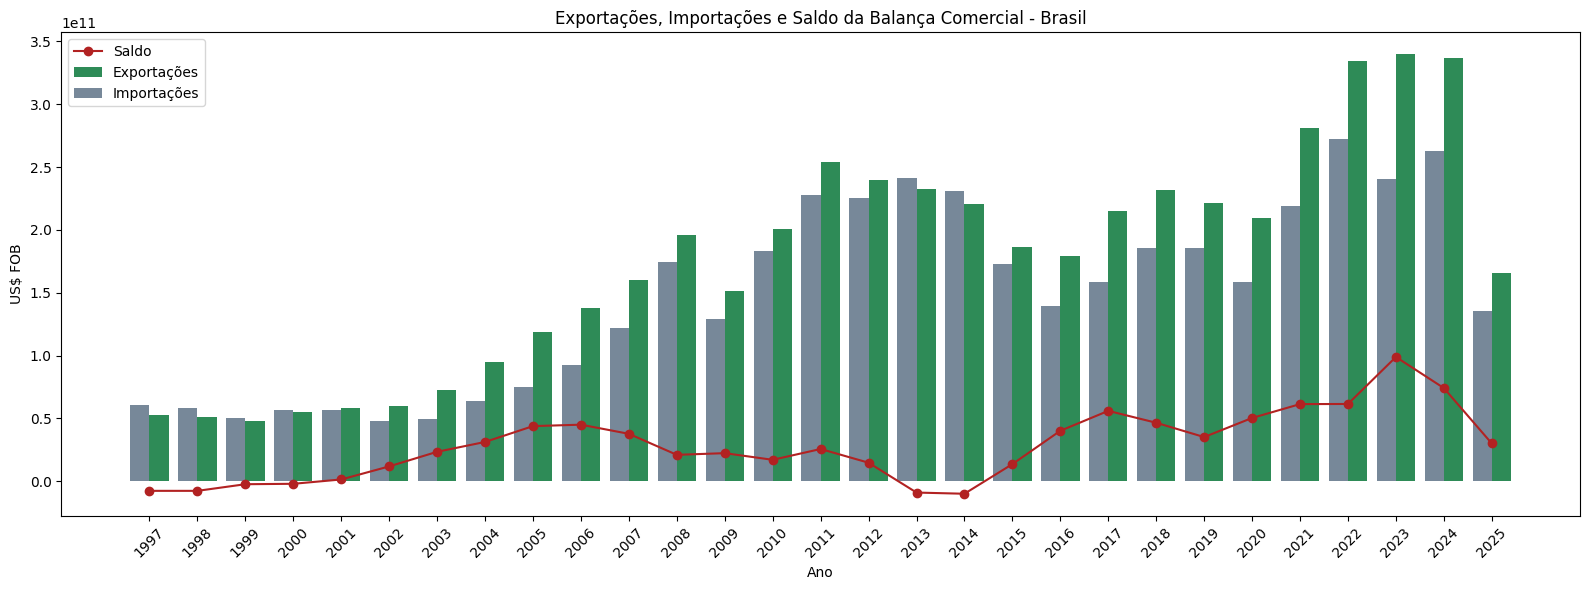

In [ ]:
anos = data_total['Ano']
x = np.arange(len(anos))
width = 0.4
plt.figure(figsize=(16, 6))
plt.bar(x - width/2, data_total['Exportacoes'], width=width, label='Exportações', color='#2E8B57')
plt.bar(x + width/2, data_total['Importacoes'], width=width, label='Importações', color='#778899')
plt.plot(x, data_total['Saldo'], label='Saldo', color='#B22222', marker='o')
plt.xticks(x, anos, rotation=45)
plt.title('Exportações, Importações e Saldo da Balança Comercial - Brasil')
plt.xlabel('Ano')
plt.gca().invert_xaxis()
plt.ylabel('US$ FOB')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

## 2.2. Análise descritiva

Observa-se uma tendência histórica crescente tanto quanto ao volume total de exportações e importações quanto ao saldo positivo da balança comercial brasileira, com um primeiro pico em 2005 e posteriormente em 2017 e 2023.

Primeiramente é importante notar um pico no saldo da balança comercial no ano de 2023, causado principalmente pela redução das importações neste ano. O montante de exportações aumentou em 2022 e se mantém constante desde então. Se verificada a manutenção de condições exógenas, como preços de produtos exportados e importados, é possível que a redução momentânea das importações tenha derivado principalmente de questões internas, como provável reflexo da insegurança de parte do mercado face à situação política interna, dado que em 2023 houve alteração no governo federal.

Além disso, nota-se que os períodos de saldo da balança comercial positivos ou negativos não correspondem necessariamente aos períodos de expansão ou retração da economia brasileira como um todo. Nos anos de 2015 e 2016 houve retração econômica, demonstrado principalmente pelo baixo volume de importações no período, e ainda assim ocorreu um aumento progressivo no saldo da balança comercial, com pico em 2017.

Outro período que importa menção é o compreendido entre 2008 e 2011, quando a economia brasileira estava em expansão, mas o saldo da balança comercial foi menor do que o do período  compreendido entre 2004 e 2007.

Momentos de aquecimento da economia tem como um efeito colateral o aumento da inflação, por haver mais moeda em circulação, o que de modo geral tende a levar ao aumento das importações o que, por sua vez, se não for acompanhando de um aumento nas exportações, leva à redução no saldo da balança comercial.

Esse aumento progressivo nas importações é visível nos dados relativos às importações nesse mesmo período analisado, à exceção de 2009. Em sentido oposto, momentos de retração econômica podem levar ao escoamento temporário de produtos para fora, impactando positivamente o volume de exportações.

É importante contextualizar que esse período de 2008 a 2012 corresponde também ao pós-crise da bolha financeira nos Estados Unidos, o que pode explicar a forte retração tanto nas importações quanto nas exportações em 2009. Também em 2020 e 2021 é importante recordar dos efeitos da pandemia no comércio internacional, sendo que em 2020 é possível verificar baixo volume tanto de importações quanto de exportações.

Nos últimos anos observa-se um grande aumento no volume de exportações, principalmente desde 2022. Há notícias de recordes históricos de safras e volumes de produtos ligados à agropecuária, os quais representam grande parcela das exportações brasileiras e que podem ter contribuído para essa alta. É digno de nota que esse alto volume não se restringe a um único ano, permanecendo relativamente constante desde 2022.

Demais conclusões dependem de outros dados a serem levantados, podendo implicar na possibilidade de que as flutuações no saldo da balança comercial ocorram muito mais por variações externas, como quedas no preço de commodities a nível mundial, do que internas. Também é necessário considerar o impacto da variação cambial nos dados obtivos.

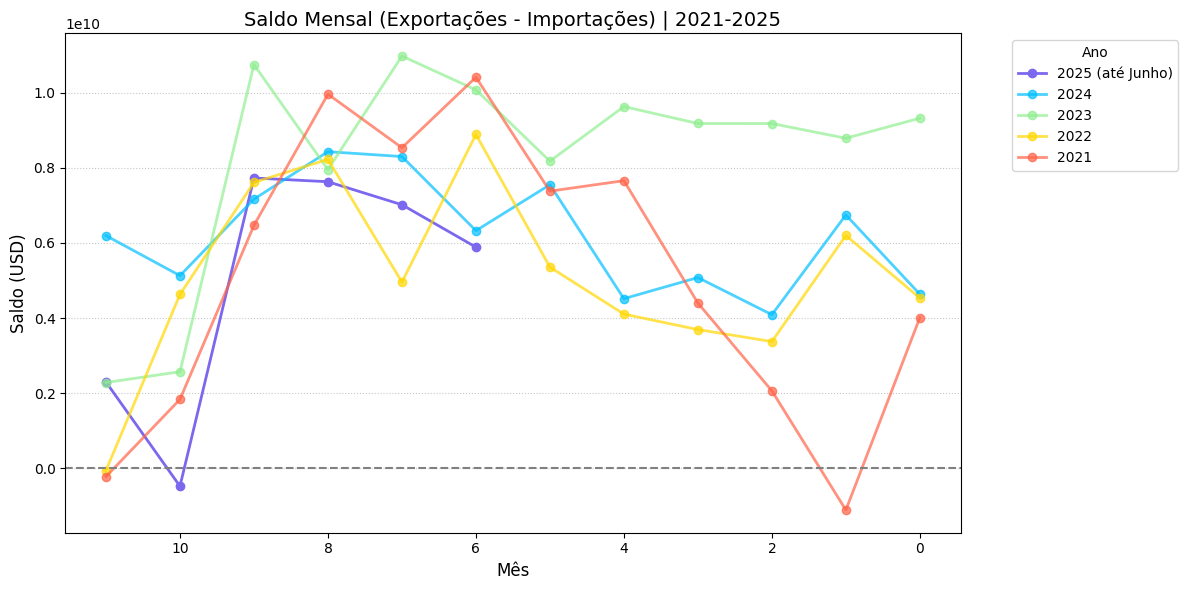

In [ ]:
anos = ['2025', '2024', '2023', '2022', '2021']
cores_ano = {
    '2024': '#00BFFF',
    '2023': '#90EE90',
    '2022': '#FFD700',
    '2021': '#FF6347',
}

saldo = pd.DataFrame()

for ano in anos:
    saldo[ano] = DataExp[f'{ano}'] - DataImp[f'{ano}']

meses_ate_junho = [11, 10, 9, 8, 7, 6]
plt.figure(figsize=(12, 6))
for ano in anos:
    if ano == '2025':
        plt.plot(meses_ate_junho, saldo.loc[meses_ate_junho, ano],
                 label=f'{ano} (até Junho)',
                 marker='o',
                 linewidth=2,
                 color='#7B68EE')
    else:
        plt.plot(saldo.index, saldo[ano],
                 label=ano,
                 marker='o',
                 linewidth=2,
                 color=cores_ano[ano],
                 alpha=0.7)

plt.title('Saldo Mensal (Exportações - Importações) | 2021-2025', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Saldo (USD)', fontsize=12)
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.gca().invert_xaxis()
plt.tight_layout()

plt.show()

O gráfico 2 apresenta a variação mensal do saldo da balança comercial, especificamente para o recorte dos anos 2021 ao 1º semestre de 2025. Percebe-se uma tendência geral de saldos maiores no 1º semestre e queda no 2º semestre em todos os anos.

O saldo da balança comercial de 2025 dá sinais de redução em seu montante mensal em comparação com os anos anteriores. É possível que esse cenário já seja um reflexo do novo cenário de aumento de barreiras tarifárias no mundo em geral, mas pode também estar atrelado à variação no preço de commodities ou instabilidade cambial.

Para dirimir essas questões, elaborei a seguir analises comparativas para a taxa cambial e posteriormente para os preços internacionais das principais commodities exportadas pelo Brasil.

Simultaneamente, pretendo manter este gráfico atualizado ao longo do ano, a fim de permitir visualizar os impactos decorrentes de eventuais acordos ou tarifas que porventura sejam aplicadas ao Brasil, principalmente os relacionados aos seus principais parceiros econômicos, como Estados Unidos, China, Argentina e União Européia como um todo, bem como de eventuais alterações legislativas que impactem o comércio exterior.

# 3. Taxa de câmbio
## 3.1. Limpeza e tratamento dos dados

In [ ]:
cambio = pd.read_csv('taxa-de-cmbio-nominal.csv', sep=';')
cambio

,DateTime,Taxa de câmbio nominal
0,2015-07-20,"3,2149"
1,2015-07-21,"3,1813"
2,2015-07-22,"3,2094"
3,2015-07-23,"3,285"
4,2015-07-24,"3,3254"
...,...,...
2504,2025-07-14,"5,5595"
2505,2025-07-15,"5,5576"
2506,2025-07-16,"5,5722"
2507,2025-07-17,"5,5737"


In [ ]:
cambio.rename(columns={'Taxa de câmbio nominal': 'TaxaCambio'}, inplace=True)
cambio.rename(columns={'DateTime': 'Data'}, inplace=True)
cambio.head()

,Data,TaxaCambio
0,2015-07-20,"3,2149"
1,2015-07-21,"3,1813"
2,2015-07-22,"3,2094"
3,2015-07-23,"3,285"
4,2015-07-24,"3,3254"


In [ ]:
cambio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        2509 non-null   object
 1   TaxaCambio  2509 non-null   object
dtypes: object(2)
memory usage: 39.3+ KB


In [ ]:
cambio['TaxaCambio'] = cambio['TaxaCambio'].str.replace(',', '').astype(int)
cambio.head()

,Data,TaxaCambio
0,2015-07-20,32149
1,2015-07-21,31813
2,2015-07-22,32094
3,2015-07-23,3285
4,2015-07-24,33254


In [ ]:
cambio['Data'] = cambio['Data'].astype(str).str.replace(r'[^\d-]', '', regex=True)
cambio.head()

,Data,TaxaCambio
0,2015-07-20,32149
1,2015-07-21,31813
2,2015-07-22,32094
3,2015-07-23,3285
4,2015-07-24,33254


In [ ]:
cambio['Data'].apply(type).value_counts()

,count
Data,
<class 'str'>,2509


In [ ]:
cambio['Data'] = cambio['Data'].astype(str).str.strip()

In [ ]:
cambio['Data'] = pd.to_datetime(cambio['Data'], format='%Y-%m-%d')
cambio.head()

,Data,TaxaCambio
0,2015-07-20,32149
1,2015-07-21,31813
2,2015-07-22,32094
3,2015-07-23,3285
4,2015-07-24,33254


In [ ]:
cambio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        2509 non-null   datetime64[ns]
 1   TaxaCambio  2509 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 39.3 KB


In [ ]:
cambio['Ano'] = cambio['Data'].dt.year
cambio.head()

,Data,TaxaCambio,Ano
0,2015-07-20,32149,2015
1,2015-07-21,31813,2015
2,2015-07-22,32094,2015
3,2015-07-23,3285,2015
4,2015-07-24,33254,2015


In [ ]:
cambio_anual = cambio.drop(columns=['Data'])
cambio_anual

,TaxaCambio,Ano
0,32149,2015
1,31813,2015
2,32094,2015
3,3285,2015
4,33254,2015
...,...,...
2504,55595,2025
2505,55576,2025
2506,55722,2025
2507,55737,2025


In [ ]:
cambio_anual = cambio_anual.groupby('Ano').mean(numeric_only=True).round(0).reset_index()
cambio_anual

,Ano,TaxaCambio
0,2015,33679.0
1,2016,32068.0
2,2017,28997.0
3,2018,33076.0
4,2019,35486.0
5,2020,47474.0
6,2021,47691.0
7,2022,47708.0
8,2023,45156.0
9,2024,48467.0


In [ ]:
data_total = data_total.sort_values('Ano')
cambio_anual = cambio_anual.sort_values('Ano')
comparacao = pd.merge(
    data_total[['Ano', 'Saldo']],
    cambio_anual[['Ano', 'TaxaCambio']],
    on='Ano'
)
comparacao.head()

,Ano,Saldo,TaxaCambio
0,2015,13678095986,33679.0
1,2016,40204771561,32068.0
2,2017,56036664350,28997.0
3,2018,46567539897,33076.0
4,2019,35198840067,35486.0


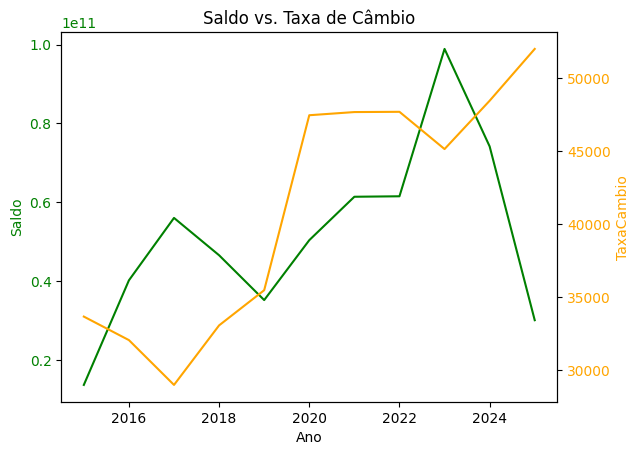

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Ano')
ax1.set_ylabel('Saldo', color='green')
ax1.plot(comparacao['Ano'], comparacao['Saldo'], color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.set_ylabel('TaxaCambio', color='orange')
ax2.plot(comparacao['Ano'], comparacao['TaxaCambio'], color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Saldo vs. Taxa de Câmbio')
plt.show()

## 3.2. Análise descritiva

O gráfico 3 apresenta a comparação entre o histórico do saldo da balança comercial com o valor nominal da taxa de câmbio ao longo dos anos 2016 a 2024. É possível perceber curtos períodos de correlação inversamente proporcional da flutuação da taxa de câmbio e do saldo da balança comercial, e um período de correlação proporcional.

Via de regra a teoria econômica dita que quando há valorização cambial há uma tendência de aumento das importações e, consequentemente, redução no saldo da balança comercial. Quando há desvalorização cambial temos menos reais em circulação em comparação com dólares, logo haveria uma tendência de escoamento de produtos, aumentando as exportações e o saldo da balança comercial.

Quanto menor o valor nominal da taxa de câmbio no gráfico, ou seja, quanto mais o valor nominal do real se aproxima de 1:1 com o dólar, mais valorizada a moeda nacional está. Quanto maior o valor nominal, assim mais distante da paridade com o dólar, mais desvalorizada a moeda está.

Percebemos, no entanto, claros momentos em que ocorre o oposto: de 2016 a 2017 percebemos valorização cambial, seguida de desvalorização de 2017 a 2020; novamente entre 2022 e 2024 temos novo momento de movimentos opostos da taxa de câmbio e do saldo da balança comercial.

Entre 2019 e 2020 a relação clássica entre a taxa de câmbio e o saldo da balança comercial fica evidente, decorrente de possível estabilização após momentos como a relação de oposição observada entre 2016 e 2018. Observando o gráfico 1, verificamos que nesse mesmo período temos aumento simultaneo e proporcional tanto das importações quanto das exportações.

É possível que do aumento nas exportações ocorra o aumento de entrada de dólares e, consequentemente, valorização cambial, gerando assim causalidade reversa. Como o Brasil é um país com grande proporção de commodities entre os seus principais produtos de exportação, períodos com alta nos preços internacionais de commodities podem ajudar a explicar saldos positivos crescentes na balaça comercial mesmo em momentos de valorização cambial.

Segundo informações que constam do site "ComexVis" do Ministério de Desenvolvimento, Indústria e Comércio, os principais produtos de exportação do Brasil atualmente são a soja, óleos brutos de petróleo, minérios de ferro, café não torrado e carne bovina, commodities que tem seu preço internacional calculado em dólares.

Para permitir a visualização do impacto da variação dos preços internacionais na balança comercial brasileira, inicialmente é necessário juntar dados obtidos de fontes diversas para posteriormente elaborar os gráficos correspondentes.

# 4. Commodities
## 4.1. Limpeza e tratamento dos dados

In [2]:
OMC_dados = pd.read_excel('CMO-Historical-Data-Annual.xlsx', sheet_name='Annual Prices (Nominal)', header=None)
OMC_dados

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,World Bank Commodity Price Data (The Pink Sheet),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"annual prices, 1960 to present, nominal US dol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(annual series are available in nominal and re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Updated on May 02, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2020,41.257778,42.3,42.165,39.308333,60.785,65.656667,2.014375,3.242024,8.313348,...,1703.986667,108.918333,6173.770833,1824.880833,17124.599167,13787.256667,2266.449167,1770.254167,883.393333,20.536583
69,2021,69.070556,70.443333,68.805,67.963333,138.05,119.840229,3.851408,16.115878,10.761649,...,2472.848333,161.71,9317.05,2200.365,32384.148333,18464.965833,3002.520833,1799.629167,1091.133333,25.164583
70,2022,97.101389,99.824167,97.049167,94.430833,344.893333,240.556977,6.368317,40.340157,18.426925,...,2705.019167,121.300833,8822.365833,2150.5975,31335.405,25833.725,3481.378333,1800.6025,961.715833,21.794417
71,2023,80.755694,82.61625,81.981667,77.669167,172.779167,119.105758,2.537808,13.113403,14.387108,...,2255.739167,120.574167,8490.290833,2135.7975,25938.113333,21521.115,2652.604167,1942.665833,966.355,23.398583


In [3]:
OMC_dados.columns = OMC_dados.iloc[6]
OMC_dados = OMC_dados.iloc[8:].reset_index(drop=True)
OMC_dados.head()

6,NaN,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South Afican","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,1960,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,678.755833,198.85,2196.733333,1631,246.191667,35.27,83.5,0.9137
1,1961,1.57,1.57,1.57,…,…,…,0.15,0.404774,…,...,511.471832,11.02,633.084167,176.975,2449.891667,1711,214.308333,35.25,83.5,0.924442
2,1962,1.52,1.52,1.52,…,…,…,0.16,0.404774,…,...,498.060392,11.01,645.143333,155.283333,2471.383333,1761,185.925,35.23,83.5,1.083725
3,1963,1.5,1.5,1.5,…,…,…,0.16,0.391351,…,...,498.795265,11.02,645.950833,174.808333,2507.733333,1741.666667,211.508333,35.09,80.930833,1.279108
4,1964,1.45,1.45,1.45,…,…,…,0.15,0.38415,…,...,525.985631,10.24,969.753333,277.883333,3412.741667,1741.666667,326.491667,35.1,88.480833,1.293


In [4]:
colunas = list(OMC_dados.columns)
colunas[0] = 'Ano'
OMC_dados.columns = colunas
OMC_dados

,Ano,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South Afican","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,1960,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,678.755833,198.85,2196.733333,1631,246.191667,35.27,83.5,0.9137
1,1961,1.57,1.57,1.57,…,…,…,0.15,0.404774,…,...,511.471832,11.02,633.084167,176.975,2449.891667,1711,214.308333,35.25,83.5,0.924442
2,1962,1.52,1.52,1.52,…,…,…,0.16,0.404774,…,...,498.060392,11.01,645.143333,155.283333,2471.383333,1761,185.925,35.23,83.5,1.083725
3,1963,1.5,1.5,1.5,…,…,…,0.16,0.391351,…,...,498.795265,11.02,645.950833,174.808333,2507.733333,1741.666667,211.508333,35.09,80.930833,1.279108
4,1964,1.45,1.45,1.45,…,…,…,0.15,0.38415,…,...,525.985631,10.24,969.753333,277.883333,3412.741667,1741.666667,326.491667,35.1,88.480833,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,41.257778,42.3,42.165,39.308333,60.785,65.656667,2.014375,3.242024,8.313348,...,1703.986667,108.918333,6173.770833,1824.880833,17124.599167,13787.256667,2266.449167,1770.254167,883.393333,20.536583
61,2021,69.070556,70.443333,68.805,67.963333,138.05,119.840229,3.851408,16.115878,10.761649,...,2472.848333,161.71,9317.05,2200.365,32384.148333,18464.965833,3002.520833,1799.629167,1091.133333,25.164583
62,2022,97.101389,99.824167,97.049167,94.430833,344.893333,240.556977,6.368317,40.340157,18.426925,...,2705.019167,121.300833,8822.365833,2150.5975,31335.405,25833.725,3481.378333,1800.6025,961.715833,21.794417
63,2023,80.755694,82.61625,81.981667,77.669167,172.779167,119.105758,2.537808,13.113403,14.387108,...,2255.739167,120.574167,8490.290833,2135.7975,25938.113333,21521.115,2652.604167,1942.665833,966.355,23.398583


In [6]:
OMC_dados.columns

Index(['Ano', 'Crude oil, average', 'Crude oil, Brent', 'Crude oil, Dubai',
       'Crude oil, WTI', 'Coal, Australian', 'Coal, South Afican',
       'Natural gas, US', 'Natural gas, Europe',
       'Liquefied natural gas, Japan', 'Natural gas index', 'Cocoa',
       'Coffee, Arabica', 'Coffee, Robusta', 'Tea, avg 3 auctions',
       'Tea, Colombo', 'Tea, Kolkata', 'Tea, Mombasa', 'Coconut oil',
       'Groundnuts', 'Fish meal', 'Groundnut oil', 'Palm oil',
       'Palm kernel oil', 'Soybeans', 'Soybean oil', 'Soybean meal', 'Barley',
       'Maize', 'Sorghum', 'Rice, Thai 5% ', 'Rice, Thai 25% ',
       'Rice, Thai A.1', 'Rice, Viet Namese 5%', 'Wheat, US SRW',
       'Wheat, US HRW', 'Banana, Europe', 'Banana, US', 'Orange', 'Beef',
       'Chicken', 'Lamb **', 'Shrimps, Mexican', 'Sugar, EU', 'Sugar, US',
       'Sugar, world', 'Tobacco, US import u.v.', 'Logs, Cameroon',
       'Logs, Malaysian', 'Sawnwood, Cameroon', 'Sawnwood, Malaysian',
       'Plywood', 'Cotton, A Index', 'Rub

In [42]:
commodities_exp = OMC_dados[['Ano', 'Soybeans', 'Crude oil, Brent', 'Iron ore, cfr spot', 'Sugar, world', 'Beef', 'Coffee, Arabica']]
commodities_exp.head()

,Ano,Soybeans,"Crude oil, Brent","Iron ore, cfr spot","Sugar, world",Beef,"Coffee, Arabica"
0,1960,91.833333,1.63,11.42,0.066208,0.736533,0.923517
1,1961,109.333333,1.57,11.02,0.05945,0.68195,0.895542
2,1962,100.54,1.52,11.01,0.061683,0.714125,0.832592
3,1963,110.093333,1.5,11.02,0.183233,0.666342,0.805742
4,1964,110.505833,1.45,10.24,0.126325,0.840883,1.009758


In [43]:
commodities_exp = commodities_exp.rename(columns={'Soybeans': 'Soja'})
commodities_exp = commodities_exp.rename(columns={'Crude oil, Brent': 'Óleo bruto'})
commodities_exp = commodities_exp.rename(columns={'Iron ore, cfr spot': 'Minério de ferro'})
commodities_exp = commodities_exp.rename(columns={'Sugar, world': 'Açúcar'})
commodities_exp = commodities_exp.rename(columns={'Beef': 'Carne bovina'})
commodities_exp = commodities_exp.rename(columns={'Coffee, Arabica': 'Café'})
commodities_exp.head()

,Ano,Soja,Óleo bruto,Minério de ferro,Açúcar,Carne bovina,Café
0,1960,91.833333,1.63,11.42,0.066208,0.736533,0.923517
1,1961,109.333333,1.57,11.02,0.05945,0.68195,0.895542
2,1962,100.54,1.52,11.01,0.061683,0.714125,0.832592
3,1963,110.093333,1.5,11.02,0.183233,0.666342,0.805742
4,1964,110.505833,1.45,10.24,0.126325,0.840883,1.009758


In [44]:
commodities_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ano               65 non-null     object
 1   Soja              65 non-null     object
 2   Óleo bruto        65 non-null     object
 3   Minério de ferro  65 non-null     object
 4   Açúcar            65 non-null     object
 5   Carne bovina      65 non-null     object
 6   Café              65 non-null     object
dtypes: object(7)
memory usage: 3.7+ KB


In [45]:
commodities_exp['Ano'] = commodities_exp['Ano'].astype(int)
commodities_exp['Soja'] = commodities_exp['Soja'].astype(float)
commodities_exp['Óleo bruto'] = commodities_exp['Óleo bruto'].astype(float)
commodities_exp['Minério de ferro'] = commodities_exp['Minério de ferro'].astype(float)
commodities_exp['Açúcar'] = commodities_exp['Açúcar'].astype(float)
commodities_exp['Carne bovina'] = commodities_exp['Carne bovina'].astype(float)
commodities_exp['Café'] = commodities_exp['Café'].astype(float)
commodities_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ano               65 non-null     int64  
 1   Soja              65 non-null     float64
 2   Óleo bruto        65 non-null     float64
 3   Minério de ferro  65 non-null     float64
 4   Açúcar            65 non-null     float64
 5   Carne bovina      65 non-null     float64
 6   Café              65 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.7 KB


In [46]:
commodities_2015 = commodities_exp[commodities_exp['Ano'] >= 2015].reset_index(drop=True)
commodities_2015

,Ano,Soja,Óleo bruto,Minério de ferro,Açúcar,Carne bovina,Café
0,2015,392.122500,52.370000,55.854167,0.296264,4.559154,3.526069
1,2016,405.447500,44.047500,58.424167,0.398063,4.060910,3.611076
2,2017,393.378112,54.392500,71.760000,0.353125,4.387249,3.323207
3,2018,394.424167,71.071667,69.751667,0.275614,4.195043,2.925972
4,2019,368.946667,64.031667,93.849167,0.280023,4.763660,2.879767
5,2020,406.639842,42.300000,108.918333,0.283128,4.667309,3.323630
6,2021,583.322500,70.443333,161.710000,0.389556,5.342410,4.511939
7,2022,675.395000,99.824167,121.300833,0.407836,5.621643,5.630434
8,2023,597.898333,82.616250,120.574167,0.516469,4.902952,4.540047
9,2024,462.494826,80.698667,109.397500,0.448603,5.931299,5.622148


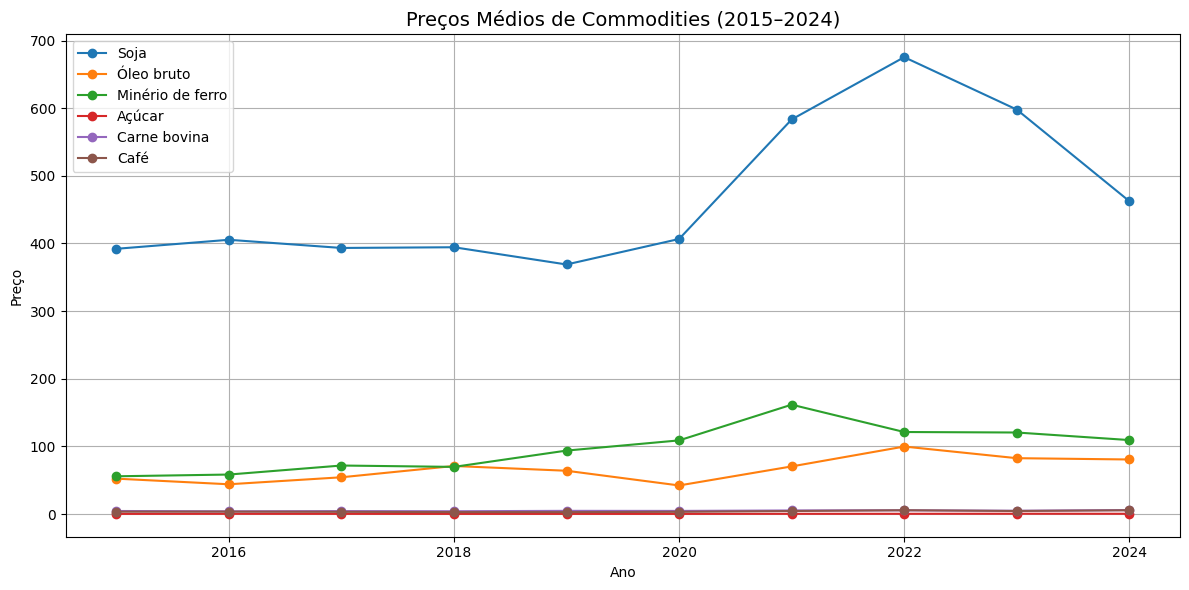

In [47]:
plt.figure(figsize=(12, 6))

for coluna in commodities_2015.columns[1:]:
    plt.plot(commodities_2015['Ano'], commodities_2015[coluna], label=coluna, marker='o')

# Personalização do gráfico
plt.title('Preços Médios de Commodities (2015–2024)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Exibir gráfico
plt.show()

## 4.2. Análise descritiva

PRECISA DE DADOS DAS IMPORTAÇÕES

Mas conclusão inicial pelo aumento no montante de exportações em 2017 e a partir de 2020 como resultado da alta de soja e café no período, justificando a correlação previamente observada entre a taxa de câmbio e o saldo da balança comercial.